#### ISAURA notebook to save all the data from the efficiency cuts for future use

Applying the cuts every time is just stupid

In [1]:
import sys,os,os.path

sys.path.append("../../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import tables as tb
import IC.invisible_cities.io.dst_io                           as     dstio
import IC.invisible_cities.io.mcinfo_io as mcio
from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad

from next_misc.Tl_studies.functions import isaura_analyse as isa

In [3]:
def apply_cuts_raw(tracks, e_low_cut = 0.05, fid_lower_z = 20, fid_upper_z = 1185, fid_r_lim = 475, e_lower = 1.55, e_upper = 1.65):
    '''
    Apply all relevant cuts and spit out dataframe at the end
    The most barebones version, no efficiency calcs, it just spits out the dataframe
    '''
  
    # make fiducial cuts
    fiducial_rel = isa.fiducial_track_cut_2(tracks, lower_z = fid_lower_z, upper_z=fid_upper_z, r_lim = fid_r_lim, verbose = False)

    # Low energy tracks, make this function work better. It seems busted currently
    low_e_cut_tracks = isa.remove_low_E_events(fiducial_rel, energy_limit = e_low_cut)

    # one track cuts 
    one_track_rel = isa.one_track_cuts(low_e_cut_tracks, verbose = False)

    # overlapping blob cut
    ovlp_rel = isa.overlapping_cuts(one_track_rel)


    # energy cuts
    ecut_rel = isa.energy_cuts(ovlp_rel, lower_e = e_lower, upper_e = e_upper)

    # return it
    return ecut_rel


In [3]:
folder_path = '../../../Tl_studies/LPR_rerun_voxel/isaura_15x15x15mm/PORT_1a/prod/isaura/'

# load in tracks
data = isa.load_tracks(folder_path)

Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


In [4]:
display(data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,5080000,0,1.064505,157.128756,65,11348,1,368.675,163.675,334.439758,...,346.677116,388.298799,273.735214,442.301561,0.591051,0.013352,0.000000,13.800000,13.900000,14.429691
1,5080002,0,2.097495,339.919849,90,13467,2,-108.325,332.675,498.257599,...,651.573556,153.314470,367.920389,502.593622,0.375646,0.151995,0.000000,14.368421,14.888889,14.403850
2,5080002,1,0.008122,14.368421,2,70,2,27.675,410.675,618.963989,...,618.963989,39.001864,416.663406,620.861787,0.008122,0.008122,0.008122,14.368421,14.888889,14.403850
3,5080004,0,0.475855,33.046321,5,4467,2,19.675,-316.325,147.604263,...,154.720772,38.507312,-310.859095,153.875947,0.406043,0.388595,0.318784,13.333333,13.833333,14.510910
4,5080004,1,0.000826,0.000000,1,28,2,36.675,-259.325,154.847458,...,154.847458,38.559927,-256.434284,154.847458,0.000826,0.000826,0.000826,13.333333,13.833333,14.510910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189473,4060708,1,0.121964,20.069324,3,1689,3,187.675,341.675,304.032379,...,308.081912,202.815692,361.157542,308.356360,0.121667,0.121094,0.120797,13.333333,15.000000,14.789446
189474,4060708,2,0.033485,20.069324,2,457,3,147.675,360.675,386.938629,...,389.520812,163.627970,365.698728,389.654063,0.033368,0.032802,0.032685,13.333333,15.000000,14.789446
189475,4060710,0,0.572125,52.800000,21,7827,1,305.675,284.675,522.397217,...,529.509638,331.248510,294.552058,526.619440,0.242639,0.188812,0.000000,14.750000,13.200000,11.883850
189476,4060712,0,0.888838,93.553991,35,6761,2,-6.325,415.675,335.498718,...,346.560197,25.349946,477.323860,418.388821,0.759932,0.028161,0.000000,12.666667,14.200000,14.509995


In [5]:
cut_data = apply_cuts_raw(data)

/home/e78368jw/Documents/NEXT_CODE/next_misc/Tl_studies/quick_notebooks/../../../Tl_studies/functions/isaura_analyse.py:289: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


### Visual check

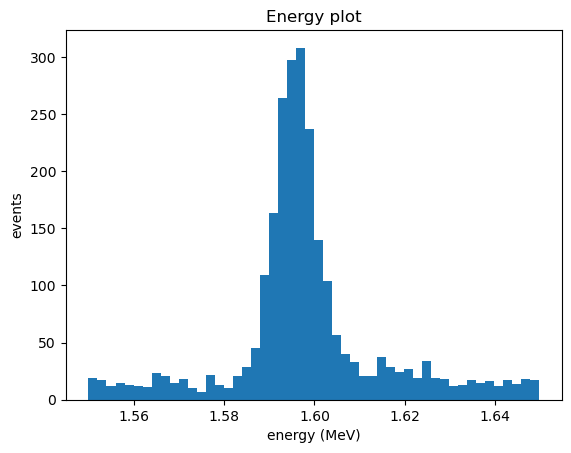

In [8]:
isa.plot_hist(cut_data, 'energy', binning=50)

In [8]:
display(cut_data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
30,5080036,0,1.596255,148.370606,57,11566,1,-98.325,308.675,260.970490,...,268.816186,-21.808474,407.837090,304.031722,0.682742,0.479417,0.0,14.166667,14.444444,12.045174
114,5080188,0,1.596243,135.904646,51,11926,1,156.675,107.675,734.490601,...,787.160369,246.035796,183.579923,740.719076,0.574430,0.397806,0.0,14.285714,14.000000,13.429004
315,5080496,0,1.594183,149.721509,60,12933,1,147.675,-166.325,322.920868,...,348.228080,153.085963,-124.132459,333.285062,0.456853,0.451467,0.0,14.300000,13.142857,13.105713
318,5080500,0,1.589982,205.359168,82,13395,1,-113.325,177.675,833.210754,...,839.223051,-65.638573,352.948549,859.177343,0.586061,0.246951,0.0,13.600000,14.307692,11.789322
326,5080512,0,1.598140,93.397310,40,13495,1,199.675,202.675,571.753174,...,581.635714,245.519546,214.330517,620.986981,0.702968,0.280580,0.0,14.000000,13.166667,14.151962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121463,4060532,0,1.592890,141.856792,68,12089,1,101.675,-359.325,833.190979,...,905.687916,120.576858,-264.555179,889.923837,0.086989,0.069762,0.0,13.666667,15.000000,13.189052
121466,4060546,0,1.595968,407.877953,84,10670,1,207.675,39.675,414.230682,...,600.959855,430.035414,48.042708,468.395088,0.202174,0.018846,0.0,14.941176,14.500000,14.777027
121469,4060550,0,1.624295,241.783804,97,11829,1,-46.325,-180.325,533.926270,...,717.327925,-0.542401,-159.900302,535.616629,0.439025,0.052087,0.0,13.714286,13.200000,14.534382
121493,4060606,0,1.594137,83.557401,51,14236,1,66.675,-1.325,499.301849,...,522.748218,134.966015,48.550782,506.152439,0.391017,0.156083,0.0,13.333333,14.750000,12.850258


In [9]:
# save cut data
cut_data.to_hdf('cut_data/23_01_P1A_10x10x10.h5', key = 'cut', mode = 'w')

In [10]:
test = pd.read_hdf('cut_data/23_01_P1A_10x10x10.h5')
display(test)
del test

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
30,5080036,0,1.596255,148.370606,57,11566,1,-98.325,308.675,260.970490,...,268.816186,-21.808474,407.837090,304.031722,0.682742,0.479417,0.0,14.166667,14.444444,12.045174
115,5080188,0,1.596243,135.904646,51,11926,1,156.675,107.675,734.490601,...,787.160369,246.035796,183.579923,740.719076,0.574430,0.397806,0.0,14.285714,14.000000,13.429004
320,5080496,0,1.594183,149.721509,60,12933,1,147.675,-166.325,322.920868,...,348.228080,153.085963,-124.132459,333.285062,0.456853,0.451467,0.0,14.300000,13.142857,13.105713
323,5080500,0,1.589982,205.359168,82,13395,1,-113.325,177.675,833.210754,...,839.223051,-65.638573,352.948549,859.177343,0.586061,0.246951,0.0,13.600000,14.307692,11.789322
331,5080512,0,1.598140,93.397310,40,13495,1,199.675,202.675,571.753174,...,581.635714,245.519546,214.330517,620.986981,0.702968,0.280580,0.0,14.000000,13.166667,14.151962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123588,4060532,0,1.592890,141.856792,68,12089,1,101.675,-359.325,833.190979,...,905.687916,120.576858,-264.555179,889.923837,0.086989,0.069762,0.0,13.666667,15.000000,13.189052
123593,4060546,0,1.595968,407.877953,84,10670,1,207.675,39.675,414.230682,...,600.959855,430.035414,48.042708,468.395088,0.202174,0.018846,0.0,14.941176,14.500000,14.777027
123596,4060550,0,1.624295,241.783804,97,11829,1,-46.325,-180.325,533.926270,...,717.327925,-0.542401,-159.900302,535.616629,0.439025,0.052087,0.0,13.714286,13.200000,14.534382
123620,4060606,0,1.594137,83.557401,51,14236,1,66.675,-1.325,499.301849,...,522.748218,134.966015,48.550782,506.152439,0.391017,0.156083,0.0,13.333333,14.750000,12.850258


### do the same, but collect the MC data as well

In [11]:
MC = isa.load_MC(folder_path)

In [14]:
# event map
display(MC[0])
# data
display(MC[1])

,evt_number
nexus_evt,
2540000,5080000
2540001,5080002
2540002,5080004
2540003,5080006
2540004,5080008
...,...
2030352,4060704
2030353,4060706
2030354,4060708


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,2540000,1,Tl208,True,0,397.564026,392.015442,534.536865,0.000000,397.564026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1,2540000,4,e-,False,1,397.564026,392.015442,534.536865,0.001609,407.646332,...,0.866701,-0.327340,0.002752,-0.000000,-0.000000,0.000000,0.547042,32.554752,RadioactiveDecay,eIoni
2,2540000,3,anti_nu_e,False,1,397.564026,392.015442,534.536865,0.001609,11181.164062,...,0.723798,-0.865316,0.547861,0.723798,-0.865316,0.547861,1.254116,18684.607422,RadioactiveDecay,Transportation
3,2540000,2,Pb208[3197.711],False,1,397.564026,392.015442,534.536865,0.001609,397.564026,...,-1.590499,1.192656,-0.550613,-0.000000,0.000000,-0.000000,0.000011,0.000000,RadioactiveDecay,RadioactiveDecay
4,2540000,6,gamma,False,2,397.564026,392.015442,534.536865,0.001609,164.141830,...,-0.455762,0.228695,0.282998,-0.000000,0.000000,-0.000000,0.583188,1501.569824,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041796,2030356,91,e-,False,55,30.259228,426.134430,352.008423,2.193173,30.096209,...,-0.162406,0.015503,-0.008732,0.000000,0.000000,0.000000,0.025482,1.436975,eIoni,eIoni
8041797,2030356,90,e-,False,55,30.279558,429.029327,353.054474,2.120956,30.183689,...,0.064169,0.157650,0.102301,0.000000,-0.000000,-0.000000,0.037231,2.202024,eIoni,eIoni
8041798,2030356,89,e-,False,55,32.744003,438.281555,344.038391,1.840851,32.722652,...,-0.022657,0.085612,0.095038,0.000000,0.000000,-0.000000,0.016253,0.597368,eIoni,eIoni
8041799,2030356,88,e-,False,55,23.930265,443.683899,364.208191,1.648568,23.785473,...,-0.025266,-0.164843,-0.084782,-0.000000,0.000000,-0.000000,0.033170,1.671516,eIoni,eIoni


In [33]:
MC_double = isa.double_event_id(MC[1])
display(MC_double)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,5080000,1,Tl208,True,0,397.564026,392.015442,534.536865,0.000000,397.564026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1,5080000,4,e-,False,1,397.564026,392.015442,534.536865,0.001609,407.646332,...,0.866701,-0.327340,0.002752,-0.000000,-0.000000,0.000000,0.547042,32.554752,RadioactiveDecay,eIoni
2,5080000,3,anti_nu_e,False,1,397.564026,392.015442,534.536865,0.001609,11181.164062,...,0.723798,-0.865316,0.547861,0.723798,-0.865316,0.547861,1.254116,18684.607422,RadioactiveDecay,Transportation
3,5080000,2,Pb208[3197.711],False,1,397.564026,392.015442,534.536865,0.001609,397.564026,...,-1.590499,1.192656,-0.550613,-0.000000,0.000000,-0.000000,0.000011,0.000000,RadioactiveDecay,RadioactiveDecay
4,5080000,6,gamma,False,2,397.564026,392.015442,534.536865,0.001609,164.141830,...,-0.455762,0.228695,0.282998,-0.000000,0.000000,-0.000000,0.583188,1501.569824,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041796,4060712,91,e-,False,55,30.259228,426.134430,352.008423,2.193173,30.096209,...,-0.162406,0.015503,-0.008732,0.000000,0.000000,0.000000,0.025482,1.436975,eIoni,eIoni
8041797,4060712,90,e-,False,55,30.279558,429.029327,353.054474,2.120956,30.183689,...,0.064169,0.157650,0.102301,0.000000,-0.000000,-0.000000,0.037231,2.202024,eIoni,eIoni
8041798,4060712,89,e-,False,55,32.744003,438.281555,344.038391,1.840851,32.722652,...,-0.022657,0.085612,0.095038,0.000000,0.000000,-0.000000,0.016253,0.597368,eIoni,eIoni
8041799,4060712,88,e-,False,55,23.930265,443.683899,364.208191,1.648568,23.785473,...,-0.025266,-0.164843,-0.084782,-0.000000,0.000000,-0.000000,0.033170,1.671516,eIoni,eIoni


In [34]:
# collect only events that are in cut_data

MC_isaura = MC_double[MC_double['event_id'].isin(cut_data['event'])]
display(MC_isaura) 

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1340,5080036,1,Tl208,True,0,395.591492,394.606506,531.592651,0.000000,395.591492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1341,5080036,4,e-,False,1,395.591492,394.606506,531.592651,0.000244,411.479492,...,0.353658,0.542898,0.496048,0.000000,-0.000000,-0.000000,0.451808,28.007418,RadioactiveDecay,eIoni
1342,5080036,3,anti_nu_e,False,1,395.591492,394.606506,531.592651,0.000244,-12500.000000,...,-0.975601,-0.153678,0.416833,-0.975601,-0.153678,0.416833,1.071991,14169.677734,RadioactiveDecay,Transportation
1343,5080036,2,Pb208[3475.078],False,1,395.591492,394.606506,531.592651,0.000244,395.591492,...,0.621942,-0.389220,-0.912880,0.000000,-0.000000,-0.000000,0.000004,0.000000,RadioactiveDecay,RadioactiveDecay
1344,5080036,6,gamma,False,2,395.591492,394.606506,531.592651,0.000244,-559.946899,...,-0.727012,-0.457868,-0.048611,-0.000000,-0.000000,0.000000,0.860554,1237.814819,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037523,4060608,75,e-,False,72,104.978249,390.607910,469.031830,1.478323,104.979515,...,0.028556,-0.007457,0.005912,0.000000,-0.000000,0.000000,0.000886,0.005419,phot,eIoni
8037524,4060608,71,e-,False,37,123.162987,364.340912,459.579254,1.218727,122.768005,...,-0.219102,0.074105,-0.038592,0.000000,0.000000,0.000000,0.051235,2.564043,eIoni,eIoni
8037525,4060608,70,e-,False,37,131.929123,355.118439,451.361572,1.152341,130.297546,...,-0.087984,0.296942,0.020893,-0.000000,0.000000,0.000000,0.086891,7.800103,eIoni,eIoni
8037526,4060608,69,e-,False,37,168.040802,365.384857,418.709412,0.868248,168.268768,...,0.097592,-0.146665,-0.040216,0.000000,0.000000,-0.000000,0.031009,1.470636,eIoni,eIoni


In [36]:
# CHECK: number of unique event_ids match number of cut_data values
print(MC_isaura['event_id'].nunique() == len(cut_data))

True


In [37]:
# save MC_data
MC_isaura.to_hdf('cut_data/MC_23_01_P1A_10x10x10.h5', key = 'cut', mode = 'w')

In [38]:
test = pd.read_hdf('cut_data/MC_23_01_P1A_10x10x10.h5')
display(test)
del test

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1340,5080036,1,Tl208,True,0,395.591492,394.606506,531.592651,0.000000,395.591492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
1341,5080036,4,e-,False,1,395.591492,394.606506,531.592651,0.000244,411.479492,...,0.353658,0.542898,0.496048,0.000000,-0.000000,-0.000000,0.451808,28.007418,RadioactiveDecay,eIoni
1342,5080036,3,anti_nu_e,False,1,395.591492,394.606506,531.592651,0.000244,-12500.000000,...,-0.975601,-0.153678,0.416833,-0.975601,-0.153678,0.416833,1.071991,14169.677734,RadioactiveDecay,Transportation
1343,5080036,2,Pb208[3475.078],False,1,395.591492,394.606506,531.592651,0.000244,395.591492,...,0.621942,-0.389220,-0.912880,0.000000,-0.000000,-0.000000,0.000004,0.000000,RadioactiveDecay,RadioactiveDecay
1344,5080036,6,gamma,False,2,395.591492,394.606506,531.592651,0.000244,-559.946899,...,-0.727012,-0.457868,-0.048611,-0.000000,-0.000000,0.000000,0.860554,1237.814819,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037523,4060608,75,e-,False,72,104.978249,390.607910,469.031830,1.478323,104.979515,...,0.028556,-0.007457,0.005912,0.000000,-0.000000,0.000000,0.000886,0.005419,phot,eIoni
8037524,4060608,71,e-,False,37,123.162987,364.340912,459.579254,1.218727,122.768005,...,-0.219102,0.074105,-0.038592,0.000000,0.000000,0.000000,0.051235,2.564043,eIoni,eIoni
8037525,4060608,70,e-,False,37,131.929123,355.118439,451.361572,1.152341,130.297546,...,-0.087984,0.296942,0.020893,-0.000000,0.000000,0.000000,0.086891,7.800103,eIoni,eIoni
8037526,4060608,69,e-,False,37,168.040802,365.384857,418.709412,0.868248,168.268768,...,0.097592,-0.146665,-0.040216,0.000000,0.000000,-0.000000,0.031009,1.470636,eIoni,eIoni


### This is if you want to produce all of them, which I dont need right now, but will redo later

In [4]:
folder_paths =  ['../../../Tl_studies/LPR_rerun_voxel/isaura_15x15x15mm/PORT_1a/prod/isaura/',
                '../../../Tl_studies/LPR_rerun_voxel/isaura_15x15x15mm/PORT_1b/prod/isaura/',
                '../../../Tl_studies/LPR_rerun_voxel/isaura_15x15x15mm/PORT_2a/prod/isaura/',
                '../../../Tl_studies/LPR_rerun_voxel/isaura_15x15x15mm/PORT_2b/prod/isaura/']
                
h5_file_names = ['cut_data/23_01_P1A_15x15x15.h5',
                 'cut_data/23_01_P1B_15x15x15.h5',
                 'cut_data/23_01_P2A_15x15x15.h5',
                 'cut_data/23_01_P2B_15x15x15.h5']

h5_nex_names =  ['cut_data/MC_23_01_P1A_15x15x15.h5',
                 'cut_data/MC_23_01_P1B_15x15x15.h5',
                 'cut_data/MC_23_01_P2A_15x15x15.h5',
                 'cut_data/MC_23_01_P2B_15x15x15.h5']


for i in range(len(folder_paths)):
    print(h5_file_names[i])
    print("")
    print("Isaura")
    # load data
    data = isa.load_tracks(folder_paths[i])

    # cut data
    cut_data = apply_cuts_raw(data)

    # save data
    cut_data.to_hdf(h5_file_names[i], key = 'cut', mode = 'w')

    # delete early to save spave
    del data

    print("NEXUS")
    # now MC
    MC = isa.load_MC(folder_paths[i])
    # double event id
    MC_double = isa.double_event_id(MC[1])
    # check for matches
    MC_isaura = MC_double[MC_double['event_id'].isin(cut_data['event'])]

    # CHECK: number of unique event_ids match number of cut_data values
    if (MC_isaura['event_id'].nunique() == len(cut_data)):
        print("Positron selection successful, continuing...")

    # save MC_data
    MC_isaura.to_hdf(h5_nex_names[i], key = 'cut', mode = 'w')


    # cleanup
    
    del cut_data
    del MC
    del MC_double
    del MC_isaura

    print("")


cut_data/23_01_P1A_15x15x15.h5

Isaura
Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %


/home/e78368jw/Documents/NEXT_CODE/next_misc/Tl_studies/quick_notebooks/../../../next_misc/Tl_studies/functions/isaura_analyse.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_low_E['numb_of_tracks'] = remove_low_E['event'].map(event_counts)


NEXUS
Positron selection successful, continuing...
cut_data/23_01_P1B_15x15x15.h5

Isaura
Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
NEXUS
Positron selection successful, continuing...
cut_data/23_01_P2A_15x15x15.h5

Isaura
Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
NEXUS
Positron selection successful, continuing...
cut_data/23_01_P2B_15x15x15.h5

Isaura
Warning! This method may take some time,
and works best with smaller datasets (like LPR).
100.00 %
NEXUS
Positron selection successful, continuing...


In [9]:
# proof of concept
proof = pd.read_hdf('P1A_15x15x15.h5')
display(proof.head(20))

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
37,5080036,0,1.596255,148.370606,57,11566,1,-98.325,308.675,260.970490,...,268.816186,-21.808474,407.837090,304.031722,0.682742,0.479417,0.0,14.166667,14.444444,12.045174
172,5080188,0,1.596243,135.904646,51,11926,1,156.675,107.675,734.490601,...,787.160369,246.035796,183.579923,740.719076,0.574430,0.397806,0.0,14.285714,14.000000,13.429004
471,5080496,0,1.594183,149.721509,60,12933,1,147.675,-166.325,322.920868,...,348.228080,153.085963,-124.132459,333.285062,0.456853,0.451467,0.0,14.300000,13.142857,13.105713
474,5080500,0,1.589982,205.359168,82,13395,1,-113.325,177.675,833.210754,...,839.223051,-65.638573,352.948549,859.177343,0.586061,0.246951,0.0,13.600000,14.307692,11.789322
488,5080512,0,1.598140,93.397310,40,13495,1,199.675,202.675,571.753174,...,581.635714,245.519546,214.330517,620.986981,0.702968,0.280580,0.0,14.000000,13.166667,14.151962
525,5080546,0,1.624835,135.647936,73,13102,1,274.675,205.675,601.143860,...,653.039899,281.034126,279.485456,602.943345,0.478832,0.054695,0.0,13.857143,14.125000,12.588403
560,5080582,0,1.595847,127.273875,67,12444,1,293.675,-39.325,683.036133,...,725.444528,343.848974,61.787506,705.178278,0.332589,0.162293,0.0,14.571429,13.888889,12.850067
632,5080668,0,1.592118,104.519054,46,11666,1,-47.325,148.675,664.138794,...,674.760209,8.766727,159.889750,742.899318,0.578547,0.538527,0.0,14.600000,14.250000,14.163818
637,5080676,0,1.594673,136.079427,62,12806,1,177.675,150.675,453.089264,...,463.562800,276.599374,159.072824,496.926709,0.608535,0.344964,0.0,14.125000,15.000000,13.008820
722,1740022,0,1.595029,252.199785,75,12399,1,186.675,-40.325,405.846893,...,499.186960,198.556032,62.293305,416.669783,0.496267,0.364702,0.0,15.000000,14.000000,14.239641
